In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [7]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(x_train)

255

In [9]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
np.mean(x_train)

72.94035223214286

In [11]:
class_names=["top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boat"]

In [12]:
#### DATA Expration

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

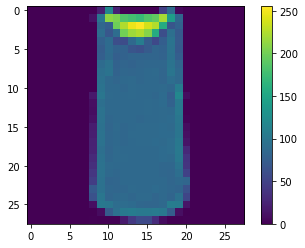

In [15]:
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()

In [16]:
x_train= x_train/255.0
x_test= x_test/255.0

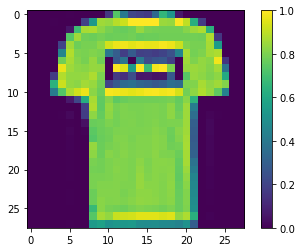

In [17]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [18]:
### build the model with tf2.x

In [19]:
from tensorflow.keras import Sequential

In [20]:
from tensorflow.keras.layers import Flatten, Dense

In [21]:
model= Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### model compilation
    - loss function
    - optimizer
    - metrics

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']);

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
history=model.fit(x_train, y_train, epochs=15, batch_size=10)

Epoch 1/15
6000/6000 [==============================] - 106s 18ms/step - loss: 0.4803 - accuracy: 0.8291
Epoch 2/15
6000/6000 [==============================] - 115s 19ms/step - loss: 0.3678 - accuracy: 0.8669
Epoch 3/15
6000/6000 [==============================] - 126s 21ms/step - loss: 0.3330 - accuracy: 0.8780
Epoch 4/15
6000/6000 [==============================] - 116s 19ms/step - loss: 0.3118 - accuracy: 0.8852
Epoch 5/15
6000/6000 [==============================] - 124s 21ms/step - loss: 0.2956 - accuracy: 0.8913
Epoch 6/15
6000/6000 [==============================] - 128s 21ms/step - loss: 0.2807 - accuracy: 0.8962
Epoch 7/15
6000/6000 [==============================] - 131s 22ms/step - loss: 0.2712 - accuracy: 0.8995
Epoch 8/15
6000/6000 [==============================] - 128s 21ms/step - loss: 0.2630 - accuracy: 0.9013
Epoch 9/15
6000/6000 [==============================] - 131s 22ms/step - loss: 0.2529 - accuracy: 0.9056
Epoch 10/15
6000/6000 [==============================] 

In [26]:
test_loss , test_acc= model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3866 - accuracy: 0.8808
0.8808000087738037


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred =np.argmax(model.predict(x_test),axis=-1)
y_pred


array([9, 2, 1, ..., 8, 1, 5])

In [29]:
accuracy_score(y_test,y_pred)

0.8808

In [31]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_dim=16))
 |  
 |  >>> # And to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, batch_input_shape=(None, 16)))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.

In [32]:
history.history

{'loss': [0.48027974367141724,
  0.3677527606487274,
  0.3330349922180176,
  0.31175872683525085,
  0.29560545086860657,
  0.28074365854263306,
  0.2711651921272278,
  0.2630324065685272,
  0.25288429856300354,
  0.24517561495304108,
  0.2381817102432251,
  0.22999753057956696,
  0.22557929158210754,
  0.219017893075943,
  0.21275831758975983],
 'accuracy': [0.8291333317756653,
  0.8668500185012817,
  0.878000020980835,
  0.8852499723434448,
  0.8913000226020813,
  0.8962000012397766,
  0.8994666934013367,
  0.9013166427612305,
  0.9055833220481873,
  0.9090499877929688,
  0.911050021648407,
  0.9146999716758728,
  0.916700005531311,
  0.9179166555404663,
  0.9192500114440918]}

In [ ]:
plt.